## SVMスクラッチ
分類のためのサポートベクターマシン（SVM、サポートベクトルマシン）のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

SVMには学習時に分類の間違いを認めるソフトマージンSVMと、認めないハードマージンSVMがありますが、ここでは実装が単純なハードマージンSVMを扱います。

以下に雛形を用意してあります。このScratchSVMClassifierクラスにコードを書き加えていってください。

雛形
```
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル

    """
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        pass
        return
```

In [1]:
import numpy as np
import logging

formatter = '%(levelname)s : %(asctime)s : %(message)s'
logging.basicConfig(filename='Logger.log', level=logging.ERROR, format=formatter)

In [2]:
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル
    self.label_ : 次の形のndarray, shape (len(set(y)),)
      出力ラベル
    self.lagrange_ : 次の形のndarray, shape (n_samples, )
      ラグランジュ乗数
    """
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False, gamma=1.0, coef0=0, degree=1):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.gamma = gamma
        self.coef0 = coef0
        self.degree = degree
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        logging.debug("[START]fit")

        self.lagrange_ = np.random.random_sample(len(X)) + 1e-7
        
        if (X_val is not None) and (y_val is not None):
            flg = 1
        else:
            flg = 0

        # 学習用にテストデータを-1 or 1にする
        self.label_ = np.array(list(set(y)))
        logging.debug("[fit:self.label_]%s", self.label_)
        dict_ = {self.label_[0]: -1, self.label_[1]: 1}
        y_train = np.array([dict_[i] for i in y])
        if flg == 1:
            y_test = np.array([dict_[i] for i in y_val])
        
        for i in range(self.iter):
            self.lagrange_ = self._lagrange_multiplier(X, y_train)
            logging.debug("[fit:self.lagrange_]%s", self.lagrange_)
            self.index_support_vectors = np.where(self.lagrange_ > self.threshold)[0]
            logging.debug("[fit:self.index_support_vectors]%s", self.index_support_vectors)
            self.n_support_vectors = len(self.index_support_vectors)
            self.lam_sv = self.lagrange_[self.index_support_vectors]
            self.X_sv = X[self.index_support_vectors]
            self.y_sv = y_train[self.index_support_vectors]

            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print(self.n_support_vectors)
        
        logging.debug("[END]fit")
        
    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        logging.debug("[START]predict")
        
        logging.debug("[predict:self.lam_sv.shape]%s", self.lam_sv.shape)
        logging.debug("[predict:self.y_sv.shape]%s", self.y_sv.shape)        
        f_x = np.dot(self._kernel(X, self.X_sv), self.lam_sv*self.y_sv)
        
        f_x = np.where(f_x >= 0, self.label_[1], self.label_[0])
        
        logging.debug("[END]predict")
        return f_x
    
    def _lagrange_multiplier(self, X, y):
        """
        ラグランジュの未定乗数法による最急降下

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        y : 次の形のndarray, shape (n_samples, 1)
          ラベルデータ

        Returns
        -------
          なし
        """
        logging.debug("[START]_lagrange_multiplier")
        
        logging.debug("[_lagrange_multiplier:X.shape]%s", X.shape)
        logging.debug("[_lagrange_multiplier:y.shape]%s", y.shape)
        lagrange_next = self.lagrange_ + self.lr*(1 - np.dot(self._kernel(X, X), y*self.lagrange_) * y)
        
        logging.debug("[END]_lagrange_multiplier")
        
        return np.where((lagrange_next >= 0), lagrange_next, 0)
        
    def _kernel(self, X_1, X_2):
        """
        カーネル関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          計算結果: 次の形のndarray, shape (n_samples, n_features)
        """
        logging.debug("[START]_kernel")
        if self.kernel == 'linear':
            logging.info("[_kernel]linear")
            ret = X_1 @ X_2.T
        elif self.kernel == 'poly':
            logging.info("[_kernel]poly")
            ret = (self.gamma*(X_1 @ X_2.T + self.coef0))**self.degree
        
        logging.debug("[END]_kernel")
        
        return ret


### 【問題1】ラグランジュの未定乗数法による最急降下
SVMの学習は、ラグランジュの未定乗数法を用います。サンプル数分のラグランジュ乗数 $\lambda$ を用意して、以下の式により更新していきます。この計算を行うメソッドをScratchSVMClassifierクラスに実装してください。

$$
\lambda_i^{new}=\lambda_i+\alpha(1-\sum_{j=1}^n\lambda_jy_iy_jk(x_i,x_j))$$

ここで $k(x_i, x_j)$ はカーネル関数です。線形カーネルの場合は次のようになります。他のカーネル関数にも対応できるように、この部分は独立したメソッドとしておきましょう。

$$
k(x_i,x_j)=x_i^Tx_j
$$

条件として、更新毎に $\lambda_i >= 0$を満たす必要があります。満たさない場合は $\lambda_i = 0$とします。


$i, j$ : サンプルのインデックス

$\lambda_i^{new}$ : 更新後のi番目のサンプルのラグランジュ乗数

$\lambda_i$ : 更新前のi番目のサンプルのラグランジュ乗数

$\alpha$ : 学習率

$\lambda_j$ : j番目のサンプルのラグランジュ乗数

$y_i$ : i番目のサンプルのラベル

$y_j$ : j番目のサンプルのラベル

$x_i$ : i番目のサンプルの特徴量ベクトル

$x_j$ : j番目のサンプルの特徴量ベクトル

あるサンプルに対しての全てのサンプルとの関係を計算していくことになります。

- _gradient_descentを追加

### 【問題2】サポートベクターの決定
計算したラグランジュ乗数 $\lambda$ が設定した閾値より大きいサンプルをサポートベクターとして扱います。推定時にサポートベクターが必要になります。サポートベクターを決定し、インスタンス変数として保持しておくコードを書いてください。


閾値はハイパーパラメータですが、1e-5程度からはじめると良いでしょう。サポートベクターの数を出力させられるようにしておくと学習がうまく行えているかを確認できます。

fitメソッドに以下の処理を追加する。
- 以下をself.iter分繰り返す
    - ラグランジュ乗数を計算する
    - サポートベクターの数をself.n_support_vectorsに設定する(printで出力しておく)
    - サポートベクターとして扱われるサンプルを決定する(self.index_support_vectorsにインデックスを設定する)
    - サポートベクターの特徴量をself.X_svに設定する
    - サポートベクターのラベルをself.y_svに設定する

### 【問題3】推定
推定時には、推定したいデータの特徴量とサポートベクターの特徴量をカーネル関数によって計算します。求めた $f(x)$ の符号が分類結果です。

$$
f(x)=\sum_{n=1}^N\lambda_ny_{sv\_n}k(x,s_n)
$$

$x$ : 推定したいデータの特徴量ベクトル

$N$ : サポートベクターの数

$n$ : サポートベクターのインデックス

$\lambda_n$ : $n$番目のサポートベクターのラグランジュ乗数

$y_{sv_n}$ : $n$番目のサポートベクターのラベル

$k()$ : カーネル関数

$s_n$ : $n$番目のサポートベクターの特徴量

- predictメソッドに$f(x)$の処理を追加

### 【問題4】学習と推定
機械学習スクラッチ入門のSprintで用意したシンプルデータセット1の2値分類に対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [4]:
# シンプルデータセット1
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

<function matplotlib.pyplot.show(*args, **kw)>

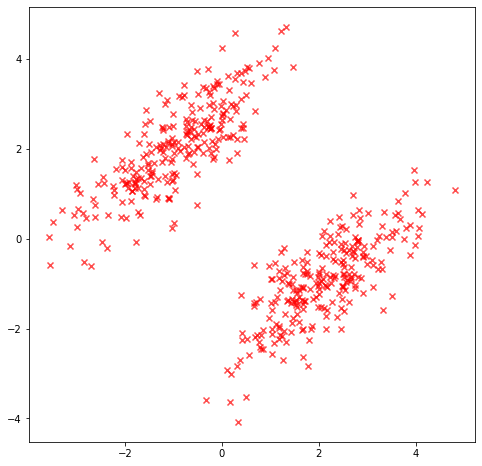

In [5]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], 
            marker="x", alpha=0.7, c="r")

plt.show

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=32)

In [7]:
svc = ScratchSVMClassifier(num_iter=100, lr=0.001, verbose=True, threshold=1e-5)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(y_pred)
print("正解率:{}".format(accuracy_score(y_test, y_pred)))
print("適合率:{}".format(precision_score(y_test, y_pred)))
print("再現率:{}".format(recall_score(y_test, y_pred)))
print("F値:{}".format(f1_score(y_test, y_pred)))
print("混合行列")
print(confusion_matrix(y_test ,y_pred))

65
55
49
46
44
43
36
34
33
29
28
25
24
23
21
21
21
20
20
20
20
19
18
18
18
18
17
16
16
16
16
16
16
16
16
16
16
15
15
15
15
15
15
15
15
14
14
14
14
14
14
14
14
14
14
14
14
13
13
13
13
13
13
13
13
12
12
12
12
12
12
12
12
11
11
10
10
10
10
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
12
12
[-1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1  1  1  1 -1  1  1  1  1
  1 -1  1 -1  1  1 -1  1 -1 -1  1 -1  1 -1  1 -1  1 -1  1  1 -1  1  1  1
 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1 -1 -1 -1  1  1
  1 -1 -1 -1 -1  1 -1  1  1  1  1 -1  1  1  1 -1 -1  1  1 -1  1 -1  1 -1
 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1  1  1 -1  1  1  1  1  1  1 -1  1  1 -1
 -1 -1  1  1 -1]
正解率:1.0
適合率:1.0
再現率:1.0
F値:1.0
混合行列
[[62  0]
 [ 0 63]]


In [8]:
svc_sklearn = SVC(kernel='linear')
svc_sklearn.fit(X_train, y_train)
y_pred = svc_sklearn.predict(X_test)
print(y_pred)
print("正解率:{}".format(accuracy_score(y_test, y_pred)))
print("適合率:{}".format(precision_score(y_test, y_pred)))
print("再現率:{}".format(recall_score(y_test, y_pred)))
print("F値:{}".format(f1_score(y_test, y_pred)))
print("混合行列")
print(confusion_matrix(y_test ,y_pred))

[-1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1  1  1  1 -1  1  1  1  1
  1 -1  1 -1  1  1 -1  1 -1 -1  1 -1  1 -1  1 -1  1 -1  1  1 -1  1  1  1
 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1 -1 -1 -1  1  1
  1 -1 -1 -1 -1  1 -1  1  1  1  1 -1  1  1  1 -1 -1  1  1 -1  1 -1  1 -1
 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1  1  1 -1  1  1  1  1  1  1 -1  1  1 -1
 -1 -1  1  1 -1]
正解率:1.0
適合率:1.0
再現率:1.0
F値:1.0
混合行列
[[62  0]
 [ 0 63]]


### 【問題5】決定領域の可視化
決定領域を可視化してください。

以下の例のようにサポートベクターは異なる色で示してください。

<img src="https://t.gyazo.com/teams/diveintocode/ee4a9ab721afe0b964aecf64b3058989.png" width="400">

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['label1', 'label2']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue', 'yellow']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    plt.scatter(model.X_sv[:, 0], model.X_sv[:, 1], s=80, color=scatter_color[2], label='suppor vector', marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

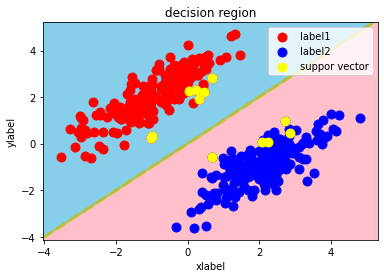

In [10]:
decision_region(X_train, y_train, svc)

## SVMとはどのような仕組みか
スクラッチ実装に必要な情報は以上ですが、大まかな仕組みの解説を行います。

SVMは決定境界と近くの点の距離（マージン）を最大化する方法です。特徴量が2つであれば以下の図のように線を引くことを考えます。

<img src="https://t.gyazo.com/teams/diveintocode/a5122026dd2f6c3065ad30bc703e1dbb.png" width="400">

決定境界は線形であれば、線形回帰やロジスティック回帰と同様に次の式です。

$$
y(x)=w^Tx
$$

$x$ : 特徴量ベクトル

$w$ : 重みベクトル

決定境界とある点 $x$ との距離 $r$ は以下の式で求められます。高校数学で学ぶ「点と直線の距離の公式」や「点と平面の距離の公式」を一般化したものです。

$$
r = \frac{y_iy(x)}{||w||}=\frac{y_iw^Tx}{||w||}
$$

$||w||$ はベクトル $w$ の大きさで、特徴量が2つならば $||w|| = \sqrt{w_{1}^2+w_{2}^2}$ です。また、学習するi番目のデータのラベルを $y_{i}=-1$または$y_{i}=1$ としています。

訓練データの中で「最も距離 $r$ が短くなる点x（サポートベクター）の距離 $r$ を最大化する $w$ を求める」ことがSVMによる分類だと言い換えられます。

これは非常に複雑な問題です。 $w$ を変化させると、最も距離 $r$ が短くなる点x（サポートベクター）も変化していくからです。計算するためには、問題を扱いやすい形に変形させる必要があります。

#### 扱いやすい形にする
まず定数 $M(>0)$ を置くと、先ほどの問題は、


「$\frac{M}{||w||}$ を $y_{i}(w^{T}x_{i})\geq M$ という条件の元で最大化する $w$ や $M$ を求める問題」


と表現できます。条件式は $x_{i}$ に訓練データの全ての点を入れて成り立つ必要があります。まだまだややこしいですが、これをMで割ってしまいます。そうすると、


「$\frac{1}{||w||}$ を $y_{i}(\frac{w^{T}}{M}x_{i})\geq 1$ という条件の元で最大化する $w$ や $M$ を求める問題」


になり、さらに $w^{T} \gets \frac{w^{T}}{M}$ と置き換えてしまいます。


そうすれば、


「 $\frac{1}{||w||}$ を $y_{i}(w^{T}X_{i})\geq 1$ という条件の元で最大化する $w$を求める問題」


まで簡単化できます。 $\frac{1}{||w||}$ を最大化するというのは $||w||$ を最小化することと同じです。これを後々さらに扱いやすくするために $\frac{1}{2}||w||^2$ を最小化すると考えます。よって、


「 $\frac{1}{2}||w||^2$ を $y_{i}(w^{T}x_{i})\geq 1$ という条件の元で最小化する $w$ を求める問題」


とすることができます。

#### 解きやすい問題にする（双対化）
こういった不等式制約を持つ最適化問題は次のように ラグランジュの未定乗数法 で置き換えられることが知られています。


なお、このように難しい問題を別の簡単な問題に言い換えることを 双対化する といいます。


ラグランジュの未定乗数法を用いると以下のラグランジュ関数が得られます。

$$
L(w,\lambda)=\frac{1}{2}||w||^2-\sum_{i=1}^N\lambda_i\{y_i(w^Tx_i)-1\}
$$

$\lambda$ はラグランジュ乗数と呼ばれる数で、0以上の値です。これを $w$について微分し、0に等しいと置くと、次の式が得られます。

$$
w=\sum_{i=1}^N\lambda_iy_ix_i
$$

（この微分のために $||w||$ ではなく $\frac{1}{2}||w||^2$ としています）


これをラグランジュ関数に代入して整理すると

$$
\sum_{i=1}^N\lambda_i-\frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N\lambda_i\lambda_jy_iy_jx_i^Tx_j
$$

を $\lambda_{i} \geq 0$ かつ $\sum_{n=1}^{N}\lambda_{i}y_{i} = 0$ の条件の元で最大化するときの $\lambda_{i}$ を探す問題に双対化できます。


この形になれば、$\lambda$ を勾配降下法により求めることができます。$w$は出てきませんが、得られる結果は同じです。

#### カーネル
最後の式の $x_{i}^{T} x_j$ の部分を $k(x_i, x_j)$ という関数に置き換えます。この関数を カーネル関数 と呼びます。

$$
\sum_{i=1}^N\lambda_i-\frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N\lambda_i\lambda_jy_iy_jk(x_i,x_j)
$$

この式が問題1の最急降下法の式の元になります。


カーネル関数は $x_{i}^{T} x_j$ ではない様々な計算に置き換えることができます。この部分を置き換えるだけで、元の特徴量を 高次元空間 に移動させたことと同じ結果が得られ、高い分類性能を得ることができます。これを カーネルトリック と呼びます。

#### 高次元へ移す簡単な例
次の図のように1次元上に2色の点があるとします。これらを直線一本を引くことで分けることは不可能です。

<img src="https://t.gyazo.com/teams/diveintocode/e75b3c8d2692afa9fba4f76485a883eb.png" width=400>

しかし、例えば以下のように変換してみると直線でも分けられそうです。
$x^2=2.5$ あたりに線を引くことになります。

<img src="https://t.gyazo.com/teams/diveintocode/5f5bacd8aac5831f1936759362b8a184.png" width=400>

これは$x^2$を計算し、それを縦軸にプロットしたグラフです。1次元だったデータを $\phi(x)=x^2$ の関数により高次元（2次元）へと移動しました。


こういったことをSVMはカーネルトリックにより行います。

### 【問題6】（アドバンス課題）多項式カーネル関数の作成
最初に作成した実装では線形カーネルを使用していました。多項式カーネルにも切り替えられるようにしましょう。

「線形カーネルの式」
$$
k(x_i,x_j)=x_i^Tx_j
$$

「多項式カーネルの式」
$$
k(x_i,x_j)=(\gamma x_i^Tx_j+\theta_0)^d
$$

$\gamma$, $\theta_0$, $d$ はハイパーパラメータです。

線形カーネルは $\gamma = 1$, $\theta_0 = 0$, $d = 1$の場合の多項式カーネルと等しいと言えます。

In [11]:
svc_2 = ScratchSVMClassifier(num_iter=100, lr=0.0001, kernel='poly', verbose=True, threshold=1e-5, gamma=0.7, coef0=0.8, degree=3)
svc_2.fit(X_train, y_train)
y_pred = svc_2.predict(X_test)
print(y_pred)
print(y_test)
print("正解率:{}".format(accuracy_score(y_test, y_pred)))
print("適合率:{}".format(precision_score(y_test, y_pred)))
print("再現率:{}".format(recall_score(y_test, y_pred)))
print("F値:{}".format(f1_score(y_test, y_pred)))
print("混合行列")
print(confusion_matrix(y_test ,y_pred))

51
49
48
45
44
44
42
42
41
40
38
36
36
35
35
35
35
34
33
33
32
32
30
29
28
28
28
28
27
27
26
26
26
26
26
25
25
25
24
24
24
24
24
24
24
23
23
23
23
23
23
23
23
23
23
23
22
22
22
22
22
22
22
21
21
21
21
21
21
21
21
21
21
21
21
21
20
20
20
20
20
20
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
[-1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1  1  1  1 -1  1  1  1  1
  1 -1  1 -1  1  1 -1  1 -1 -1  1 -1  1 -1  1 -1  1 -1  1  1 -1  1  1  1
 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1 -1 -1 -1  1  1
  1 -1 -1 -1 -1  1 -1  1  1  1  1 -1  1  1  1 -1 -1  1  1 -1  1 -1  1 -1
 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1  1  1 -1  1  1  1  1  1  1 -1  1  1 -1
 -1 -1  1  1 -1]
[-1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1  1  1  1 -1  1  1  1  1
  1 -1  1 -1  1  1 -1  1 -1 -1  1 -1  1 -1  1 -1  1 -1  1  1 -1  1  1  1
 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1 -1 -1 -1  1  1
  1 -1 -1 -1 -1  1 -1  1  1  1  1 -1  1  1  1 -1 -1  1  1 -1  1 -1  1 -1
 -1 -1 -1 -1  1 -1  1  1 -

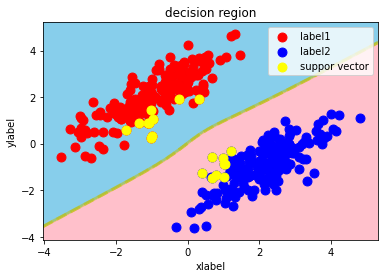

In [12]:
decision_region(X_train, y_train, svc_2)